## Assessing the variation in mRNA-protein correlation with respect to the aggregated protein reproducibility rank

**Input:** 
<ul>
    <li> Aggregated protein reproducibility rank</li>
    <li> mRNA-protein correlation of studies without replicate proteomic profiles</li>
    <li> CORUM protein complex membership information</li>
</ul>          

#### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import common_utils
import customized_plots
import graphing_utils as gu

plt.style.use(['seaborn-white'])

In [2]:
get_data_path = lambda folders, fname: os.path.normpath(os.environ['DATA_PATH']+'/'+'/'.join(folders) +'/'+ fname)
get_local_data_path = lambda folders, fname: os.path.normpath('../local_data/'+'/'+'/'.join(folders) +'/'+ fname)

file_proteomic_replicates = get_local_data_path(['results'], 'TableS2.xlsx')
file_mRNA_protein_correlations = get_local_data_path(['results'], 'TableS1.xlsx')
file_protein_complexes = get_data_path(['protein_properties', 'CORUM'], 'allComplexes.txt')

#### Load data

In [3]:
replicate_correlations = pd.read_excel(file_proteomic_replicates, sheet_name='B. Protein reproducibility rank', 
                                       index_col=0)
replicate_correlations[:2]

,Ovarian Reproducibility Rank,Colon Reproducibility Rank,CCLE Reproducibility Rank,Aggregated Reproducibility Rank
A1BG,0.772775,0.45424,NaN,0.575671
A2M,0.883270,0.39603,0.22406,0.501120


In [4]:
aggregated_normalized_ranks = replicate_correlations['Aggregated Reproducibility Rank'].copy(deep=True).dropna()

In [5]:
mRNA_protein_correlations =  pd.read_excel(file_mRNA_protein_correlations, sheet_name='A. mRNA-protein correlation', 
                                           index_col=0)
mRNA_protein_correlations[:2]

,CRC (2014),BrCa (2016),Ovarian,Colon,ccRCC,EC,LUAD,BrCa (2020),HNSCC,GBM,NCI60,CCLE,GTEx
Gene symbol,,,,,,,,,,,,,
A1BG,0.123133,-0.093805,-0.078889,NaN,0.035573,0.324974,-0.119663,0.077242,0.065872,-0.192863,NaN,NaN,0.154523
A1CF,NaN,NaN,NaN,0.673548,0.908613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.188605


In [6]:
mRNA_protein_cor_brca_16 =  mRNA_protein_correlations['BrCa (2016)'].copy(deep=True).dropna()
mRNA_protein_cor_ccRCC =  mRNA_protein_correlations['ccRCC'].copy(deep=True).dropna()
mRNA_protein_cor_endo =  mRNA_protein_correlations['EC'].copy(deep=True).dropna()
mRNA_protein_cor_lung =  mRNA_protein_correlations['LUAD'].copy(deep=True).dropna()
mRNA_protein_cor_hnscc =  mRNA_protein_correlations['HNSCC'].copy(deep=True).dropna()
mRNA_protein_cor_gbm =  mRNA_protein_correlations['GBM'].copy(deep=True).dropna()
mRNA_protein_cor_brca_20 =  mRNA_protein_correlations['BrCa (2020)'].copy(deep=True).dropna()
mRNA_protein_cor_gtex =  mRNA_protein_correlations['GTEx'].copy(deep=True).dropna()
mRNA_protein_cor_crc14 =  mRNA_protein_correlations['CRC (2014)'].copy(deep=True).dropna()
mRNA_protein_cor_nci60 =  mRNA_protein_correlations['NCI60'].copy(deep=True).dropna()

In [7]:
xlab = "Aggregated Protein Reproducibility Deciles"
ylab = "mRNA-Protein correlation"

In [8]:
import statsmodels.api as sm
def ols_fit(x, y, match_subsets=True):
    x_subset, y_subset = common_utils.get_matched_index(x, y) 
    est = sm.OLS(y_subset, sm.add_constant(x_subset.astype(float))).fit()
    return est

In [9]:
all_studies = [mRNA_protein_cor_crc14, mRNA_protein_cor_brca_16, mRNA_protein_cor_ccRCC,
               mRNA_protein_cor_brca_20, mRNA_protein_cor_gtex, mRNA_protein_cor_endo, mRNA_protein_cor_lung,
               mRNA_protein_cor_hnscc, mRNA_protein_cor_gbm, mRNA_protein_cor_nci60]

In [10]:
rsquared_ar = {}
print("Regressing mRNA-protein correlation using Aggregated Ranks")
for study in all_studies: 
    rsquared_ar[study.name] = round(ols_fit(x=aggregated_normalized_ranks, y = study).rsquared_adj * 100, 2)

Regressing mRNA-protein correlation using Aggregated Ranks


C:\Users\swath\Anaconda3\envs\omics_reproducibility\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
palette = [gu.get_color('green')]
args = [gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="CRC (2014)", palette=palette, 
                                      r2=rsquared_ar['CRC (2014)']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="BrCa (2016)", palette=palette, 
                                      r2=rsquared_ar['BrCa (2016)']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="ccRCC", palette=palette, 
                                      r2=rsquared_ar['ccRCC']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="BrCa (2020)", palette=palette, 
                                      r2=rsquared_ar['BrCa (2020)']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="Lung Adenocarcinoma", palette=palette, 
                                      r2=rsquared_ar['LUAD']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="Endometrial Cancer", palette=palette,
                                      r2=rsquared_ar['EC']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="HNSCC", palette=palette, 
                                      r2=rsquared_ar['HNSCC']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="GBM", palette=palette, 
                                      r2=rsquared_ar['GBM']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="NCI60", palette=palette, 
                                      r2=rsquared_ar['NCI60']),
        gu.additional_plot_parameters(xlab=xlab, ylab=ylab, title="GTEx", palette=palette, 
                                      r2=rsquared_ar['GTEx'])]

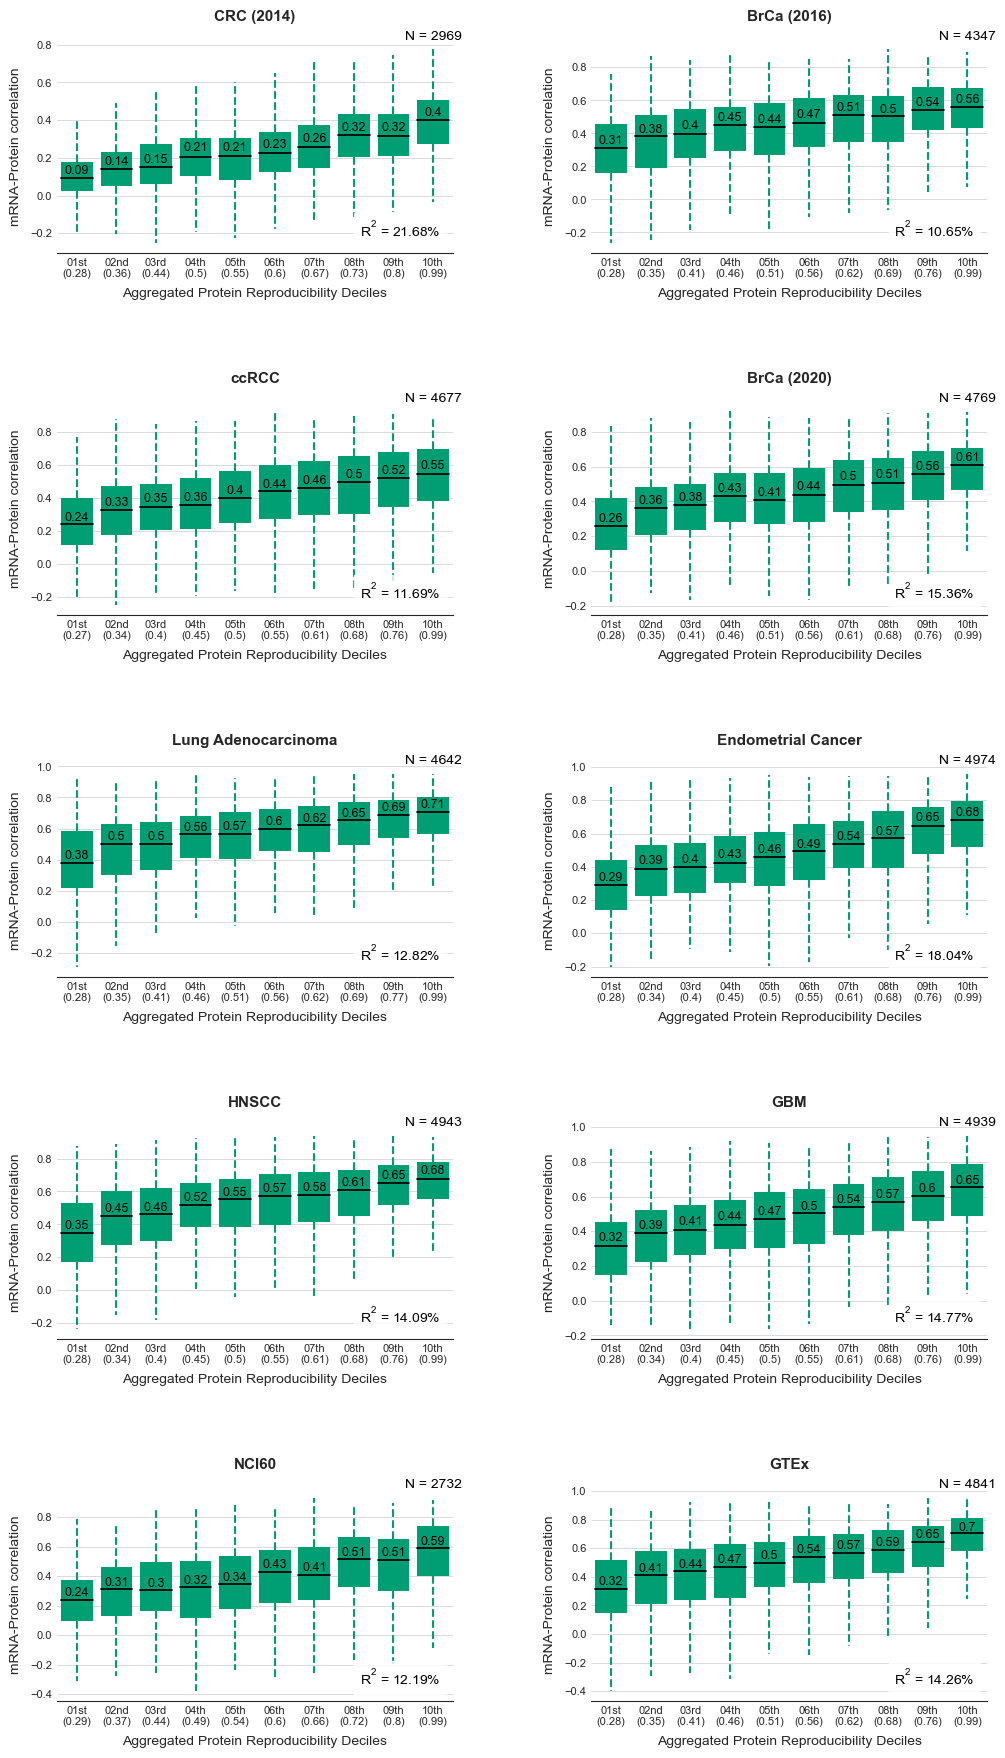

In [12]:
with plt.rc_context({'axes.linewidth': 0.8}):
    figure, ax = plt.subplots(5, 2, figsize=(12,22))
    customized_plots.draw_boxplot(ax[0, 0], aggregated_normalized_ranks, mRNA_protein_cor_crc14, args[0])
    customized_plots.draw_boxplot(ax[0, 1], aggregated_normalized_ranks, mRNA_protein_cor_brca_16, args[1])
    customized_plots.draw_boxplot(ax[1, 0], aggregated_normalized_ranks, mRNA_protein_cor_ccRCC, args[2])
    customized_plots.draw_boxplot(ax[1, 1], aggregated_normalized_ranks, mRNA_protein_cor_brca_20, args[3])    
    customized_plots.draw_boxplot(ax[2, 0], aggregated_normalized_ranks, mRNA_protein_cor_lung, args[4])
    customized_plots.draw_boxplot(ax[2, 1], aggregated_normalized_ranks, mRNA_protein_cor_endo, args[5])
    customized_plots.draw_boxplot(ax[3, 0], aggregated_normalized_ranks, mRNA_protein_cor_hnscc, args[6])
    customized_plots.draw_boxplot(ax[3, 1], aggregated_normalized_ranks, mRNA_protein_cor_gbm, args[7])    
    customized_plots.draw_boxplot(ax[4, 0], aggregated_normalized_ranks, mRNA_protein_cor_nci60, args[8])
    customized_plots.draw_boxplot(ax[4, 1], aggregated_normalized_ranks, mRNA_protein_cor_gtex, args[9])
    plt.subplots_adjust(wspace=0.35, hspace=0.7)
#     figure.savefig('../figures/Figure4.svg', bbox_inches='tight', dpi=300)

<div class="alert alert-block alert-success">
With increase in the decile of the internal method of Aggregated Reproducibility Rank, mRNA-protein correlation of studies without replicate proteomic profiles also increases.
</div>

### mRNA-protein correlation variation wrt protein complex membership

In [13]:
protein_complexes = pd.read_csv(file_protein_complexes, sep="\t", index_col=0)
protein_complexes = protein_complexes[protein_complexes["Organism"] == "Human"][["subunits(Gene name)"]]
protein_complex_members = pd.unique(protein_complexes["subunits(Gene name)"].str.split(";", expand=True).stack()).tolist()
print("Dimensions: ", len(protein_complex_members))

Dimensions:  3664


In [14]:
palette = [gu.get_color(name) for name in ['denim-blue', 'dark-sky-blue', 'light-blue']]
for arg in args:
    arg.palette = palette
    arg.show_legend=False
args[0].show_legend=True

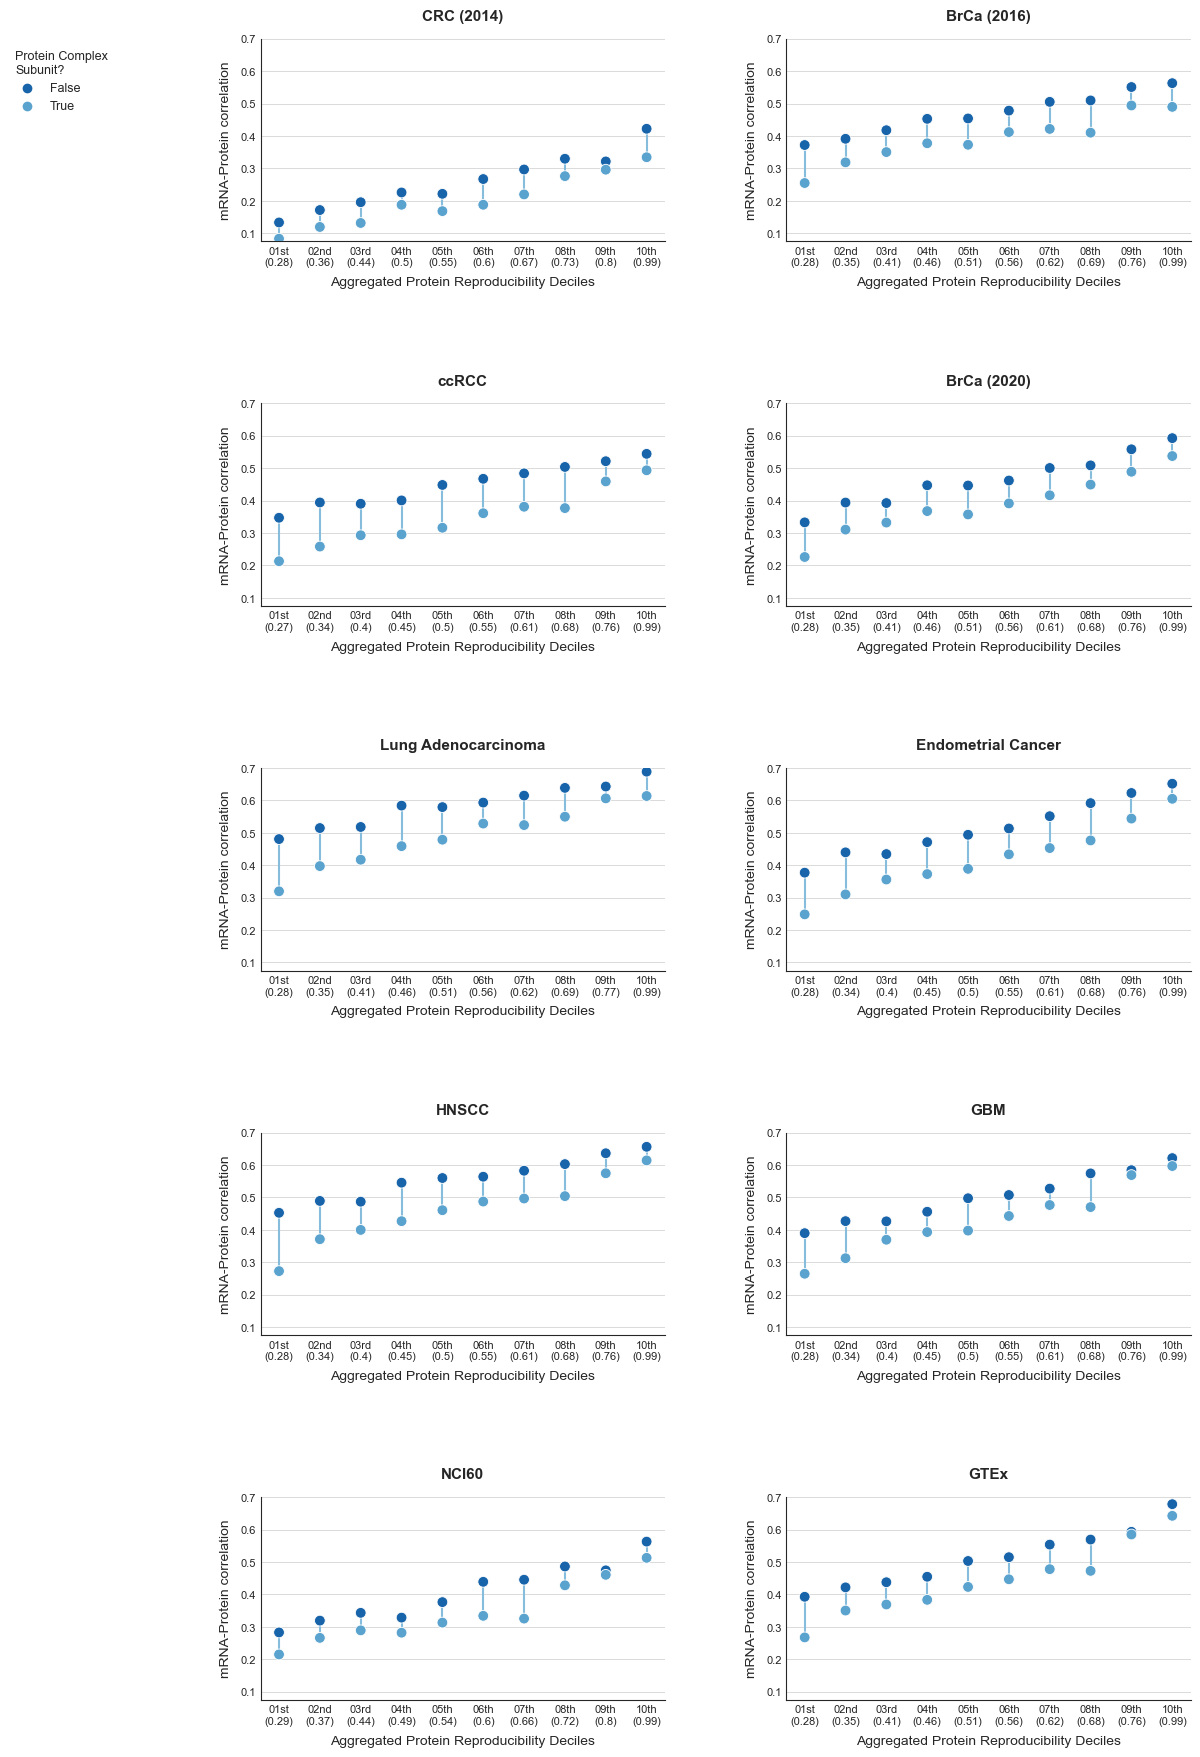

In [15]:
with plt.rc_context({'axes.linewidth': 0.8, 'axes.spines.left': True}):
    figure, ax = plt.subplots(5, 2, figsize=(12,22))
    customized_plots.draw_ranged_dotplot(ax[0,0], aggregated_normalized_ranks, mRNA_protein_cor_crc14, 
                                         protein_complex_members, args[0])
    customized_plots.draw_ranged_dotplot(ax[0,1], aggregated_normalized_ranks, mRNA_protein_cor_brca_16, 
                                         protein_complex_members, args[1])
    customized_plots.draw_ranged_dotplot(ax[1,0], aggregated_normalized_ranks, mRNA_protein_cor_ccRCC, 
                                         protein_complex_members, args[2])
    customized_plots.draw_ranged_dotplot(ax[1,1], aggregated_normalized_ranks, mRNA_protein_cor_brca_20, 
                                         protein_complex_members, args[3])
    customized_plots.draw_ranged_dotplot(ax[2,0], aggregated_normalized_ranks, mRNA_protein_cor_lung, 
                                         protein_complex_members, args[4])
    customized_plots.draw_ranged_dotplot(ax[2,1], aggregated_normalized_ranks, mRNA_protein_cor_endo, 
                                         protein_complex_members, args[5])
    customized_plots.draw_ranged_dotplot(ax[3,0], aggregated_normalized_ranks, mRNA_protein_cor_hnscc, 
                                         protein_complex_members, args[6])
    customized_plots.draw_ranged_dotplot(ax[3,1], aggregated_normalized_ranks, mRNA_protein_cor_gbm, 
                                         protein_complex_members, args[7])
    customized_plots.draw_ranged_dotplot(ax[4,0], aggregated_normalized_ranks, mRNA_protein_cor_nci60, 
                                         protein_complex_members, args[8])
    customized_plots.draw_ranged_dotplot(ax[4,1], aggregated_normalized_ranks, mRNA_protein_cor_gtex, 
                                         protein_complex_members, args[9])
    plt.subplots_adjust(hspace=0.8, wspace=0.3)

<div class="alert alert-block alert-success">
With increase in the decile of the internal method of Aggregated Reproducibility Rank, mRNA-protein correlation of studies without replicate proteomic profiles also increases. However, the proteins belonging to protein complex(es) have a lower mRNA-protein correlation in general across all the deciles.
</div>